In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import torch
import torch.nn.functional as F

In [4]:
from torchvision import transforms
from torchvision import models
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import lr_scheduler
from torch import optim
from torchvision.utils import make_grid


In [5]:
from glob import glob

In [6]:
class MultiClassifier(nn.Module):
    def __init__(self):
        super(MultiClassifier, self).__init__()
        self.ConvLayer1 = nn.Sequential(
            nn.Conv2d(1, 64, 3), # 3, 256, 256
            nn.MaxPool2d(2), # op: 16, 127, 127
            nn.ReLU(), # op: 64, 127, 127
        )
        self.ConvLayer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3), # 64, 127, 127   
            nn.MaxPool2d(2), #op: 128, 63, 63
            nn.ReLU() # op: 128, 63, 63
        )
        self.ConvLayer3 = nn.Sequential(
            nn.Conv2d(128, 256, 3), # 128, 63, 63
            nn.MaxPool2d(2), #op: 256, 30, 30
            nn.ReLU() #op: 256, 30, 30
        )
        
        self.Linear1 = nn.Linear(256, 64)
        self.Linear2 = nn.Linear(64, 10)
                
        
    def forward(self, x):
        x = self.ConvLayer1(x)
        x = self.ConvLayer2(x)
        x = self.ConvLayer3(x)

        x = x.view(x.size(0), -1)
        x = self.Linear1(x)
        x = self.Linear2(x)
        return F.softmax(x)



In [7]:
model = MultiClassifier()


In [8]:
model.load_state_dict(torch.load('./fmnist_cls.pth'))
# model.load_state_dict(torch.load('./mnist_cls.pth'))

<All keys matched successfully>

In [9]:
model = model.cuda()

In [10]:
!pwd

/home/iis519409/DPGEN-FashionMNIST


In [11]:
# !ls exp/image_samples/1015_FashionMNIST_EXP_EXP1_K2_IMAGE_SIZE_28_BATCH_128_TWCII | wc -l
!ls exp/image_samples/

1015_FashionMNIST_EXP_EXP10_K5_IMAGE_SIZE_28_BATCH_128_TWCII
1015_FashionMNIST_EXP_EXP1_K2_IMAGE_SIZE_28_BATCH_128_TWCII
1020_MNIST_EXP_EXP10_K5_IMAGE_SIZE_28_BATCH_128_TWCII
1020_MNIST_EXP_EXP2_K2_IMAGE_SIZE_28_BATCH_128_TWCII
1023_FashionMNIST_EXP_EXPINF_K5_IMAGE_SIZE_28_BATCH_128_TWCII
1023_MNIST_EXP_EXPINF_K5_IMAGE_SIZE_28_BATCH_128_TWCII
1108_FashionMNIST_EXP_EXP02_K2_IMAGE_SIZE_28_BATCH_256_TWCII
1108_MNIST_EXP_EXP02_K2_IMAGE_SIZE_28_BATCH_256_TWCII
1109_FashionMNIST_EXP_EXP02_K2_IMAGE_SIZE_28_BATCH_128_TWCII
1109_FashionMNIST_EXP_EXP02_K2_IMAGE_SIZE_28_BATCH_256_TWCII
1109_MNIST_EXP_EXP02_K2_IMAGE_SIZE_28_BATCH_128_TWCII
images


In [22]:
# base = 'exp/image_samples/1020_MNIST_EXP_EXP2_K2_IMAGE_SIZE_28_BATCH_128_TWCII/'
# base = 'exp/image_samples/1020_MNIST_EXP_EXP10_K5_IMAGE_SIZE_28_BATCH_128_TWCII/'
# base = 'exp/image_samples/1023_MNIST_EXP_EXPINF_K5_IMAGE_SIZE_28_BATCH_128_TWCII/'

# base = 'exp/image_samples/1023_FashionMNIST_EXP_EXPINF_K5_IMAGE_SIZE_28_BATCH_128_TWCII/'

base = 'exp/image_samples/1109_FashionMNIST_EXP_EXP02_K2_IMAGE_SIZE_28_BATCH_128_TWCII/'



In [23]:
images = glob(base + '/*')

In [24]:
len(images)

2816

In [25]:
x = Image.open(images[6])

In [26]:
transform=transforms.Compose([
    transforms.ToTensor(),
                             ])

In [27]:
x = transform(x)

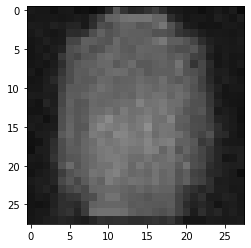

In [28]:
plt.imshow(x.permute(1,2,0))

In [29]:
x.shape

torch.Size([3, 28, 28])

In [30]:
torch.all(x[0] == x[1])

tensor(True)

In [31]:
x[:1,...].shape

torch.Size([1, 28, 28])

In [32]:
model(x[:1,...].unsqueeze(0).cuda())

/tmp/ipykernel_31148/3427690861.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


tensor([[2.2960e-02, 5.8495e-01, 2.1024e-01, 2.7752e-03, 3.5681e-02, 3.3897e-04,
         4.6696e-02, 5.8941e-03, 6.8899e-02, 2.1573e-02]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)

In [33]:
images[0]

'exp/image_samples/1109_FashionMNIST_EXP_EXP02_K2_IMAGE_SIZE_28_BATCH_128_TWCII/image_663.png'

In [34]:
len(images)

2816

In [35]:
train_x = []
train_y = []

In [36]:
from time import time

In [37]:
st = time()

for ix, img in enumerate(images):
    if ix % 100 == 0:
        print(ix, time() - st)
        
    x = transform(Image.open(img))
    pred_y = model(x[:1,...].unsqueeze(0).cuda())
    
    np_x = x.cpu().numpy()
    np_y = torch.round(pred_y).cpu().detach().numpy()[0]
    
    train_x.append(np_x)
    train_y.append(np_y)
    

0 0.00023317337036132812
100 0.08258581161499023
200 0.15847110748291016


/tmp/ipykernel_31148/3427690861.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


300 0.23533058166503906
400 0.3111245632171631
500 0.38681459426879883
600 0.46296167373657227
700 0.5379583835601807
800 0.6134734153747559
900 0.6896984577178955
1000 0.7654495239257812
1100 0.8410212993621826
1200 0.9166743755340576
1300 0.99202561378479
1400 1.0670750141143799
1500 1.1428580284118652
1600 1.217747449874878
1700 1.2922687530517578
1800 1.3671774864196777
1900 1.4418628215789795
2000 1.5167934894561768
2100 1.5923523902893066
2200 1.6680736541748047
2300 1.7436561584472656
2400 1.8195934295654297
2500 1.894538402557373
2600 1.9697504043579102
2700 2.0457396507263184
2800 2.122020721435547


In [38]:
import numpy as np

In [39]:
yy = [np.argmax(y) for y in train_y]

In [40]:
np.unique(yy, return_counts=True)

(array([0, 1, 2, 4, 6, 8]), array([1071, 1026,  708,    3,    6,    2]))

In [41]:
import joblib

In [42]:
joblib.dump(train_x, './train_fmnist_x_exp_02.pkl')
joblib.dump(train_y, './train_fmnist_y_exp_02.pkl')

['./train_fmnist_y_exp_02.pkl']

In [ ]:
# joblib.dump(train_x, './train_fmnist_x_exp_inf.pkl')
# joblib.dump(train_y, './train_fmnist_y_exp_inf.pkl')

In [ ]:
# joblib.dump(train_x, './train_mnist_x_exp_inf.pkl')
# joblib.dump(train_y, './train_mnist_y_exp_inf.pkl')

In [ ]:
# joblib.dump(train_x, './train_mnist_x_exp1_k2.pkl')
# joblib.dump(train_y, './train_mnist_y_exp1_k2.pkl')

In [ ]:
# joblib.dump(train_x, './train_mnist_x_exp10_k5.pkl')
# joblib.dump(train_y, './train_mnist_y_exp10_k5.pkl')